1. What are the most popular products based on sales frequency?
2. What time of day do most transactions occur?
3. Do customers tend to purchase single or multiple products in a transaction?
4. Is there a pattern in returning customers' purchases over time?

In [1]:


import pandas as pd
import matplotlib.pyplot as plt

# Load iPhone sales dataset
Order_Details = pd.read_csv('/content/iPhoneSales-Analysis.csv')

# Convert transaction date to datetime format
Order_Details['Transaction Date'] = pd.to_datetime(Order_Details['Transaction Date'])

# Create useful time-based columns
Order_Details['Hour'] = Order_Details['Transaction Date'].dt.hour
Order_Details['Month'] = Order_Details['Transaction Date'].dt.month
Order_Details['Day'] = Order_Details['Transaction Date'].dt.day
Order_Details['Weekday'] = Order_Details['Transaction Date'].dt.day_name()


In [16]:
# here we have taken Transaction
# date column
Order_Details['Time'] = pd.to_datetime(Order_Details['Transaction Date'])

# After that we extracted hour
# from Transaction date column
Order_Details['Hour'] = (Order_Details['Time']).dt.hour


In [17]:
# n =24 in this case, can be modified
# as per need to see top 'n' busiest hours
timemost1 = Order_Details['Hour'].value_counts().index.tolist()[:24]

timemost2 = Order_Details['Hour'].value_counts().values.tolist()[:24]


In [18]:
tmost = np.column_stack((timemost1,timemost2))

print(" Hour Of Day" + "\t" + "Cumulative Number of Purchases \n")
print('\n'.join('\t\t'.join(map(str, row)) for row in tmost))


 Hour Of Day	Cumulative Number of Purchases 

12		51
23		51
22		45
19		42
15		41
21		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


In [19]:
timemost = Order_Details['Hour'].value_counts()
timemost1 = []

for i in range(0,23):
    timemost1.append(i)

timemost2 = timemost.sort_index()
timemost2.tolist()
timemost2 = pd.DataFrame(timemost2)


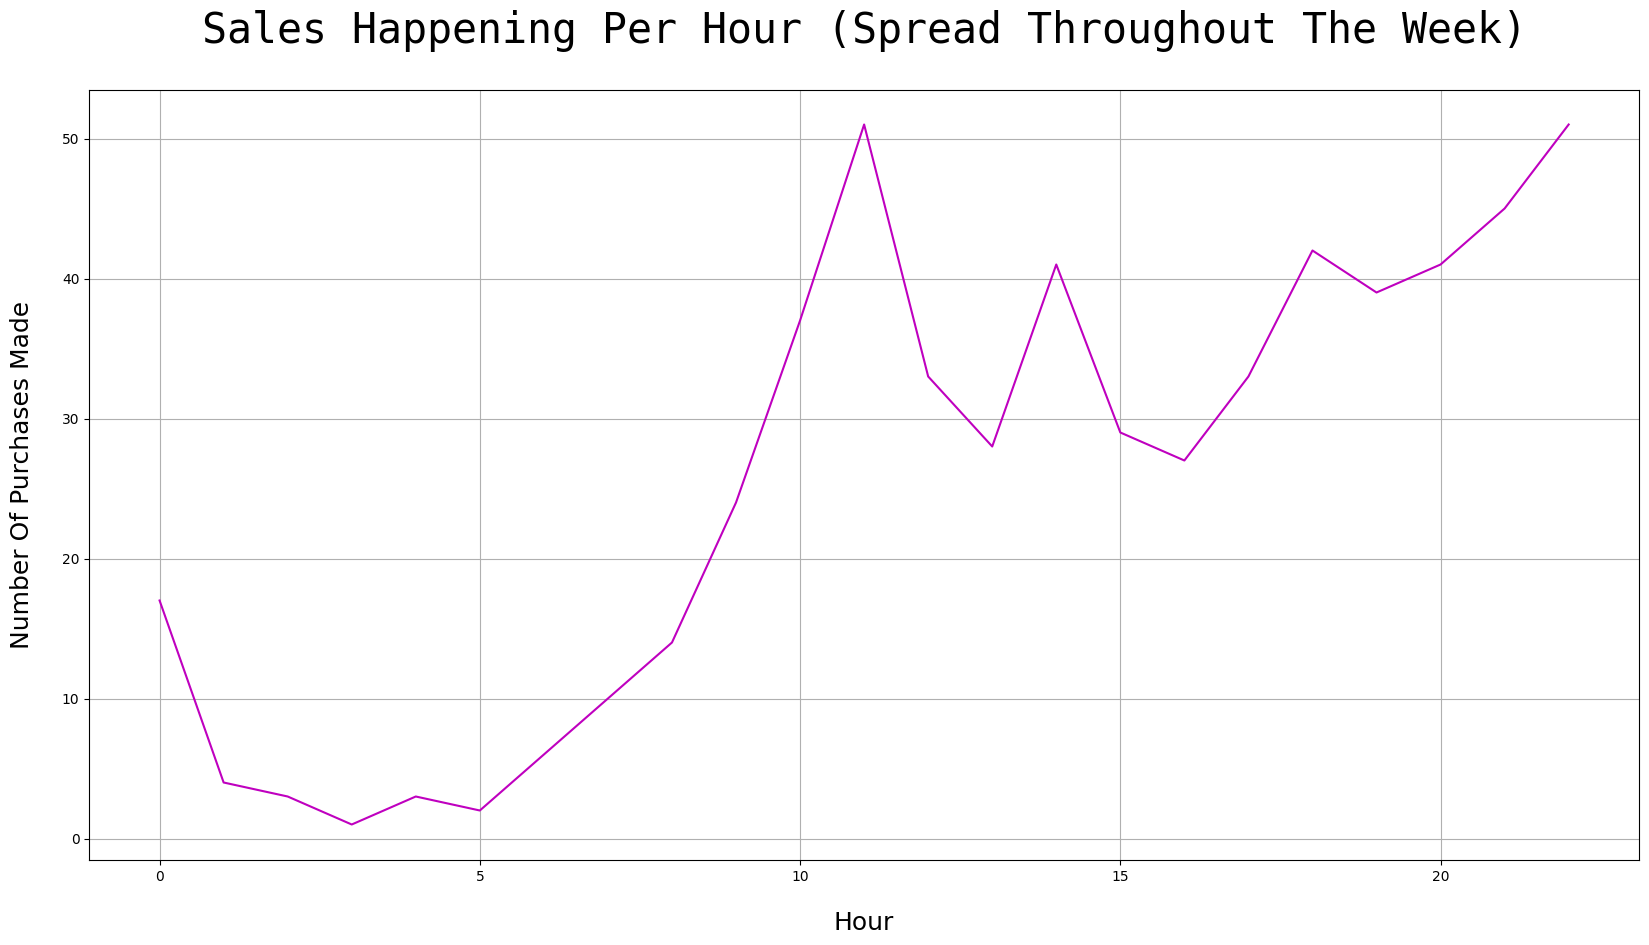

In [20]:
plt.figure(figsize=(20, 10))

plt.title('Sales Happening Per Hour (Spread Throughout The Week)',
          fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1.05)

plt.ylabel("Number Of Purchases Made", fontsize=18, labelpad=20)
plt.xlabel("Hour", fontsize=18, labelpad=20)
plt.plot(timemost1, timemost2, color='m')
plt.grid()
plt.show()


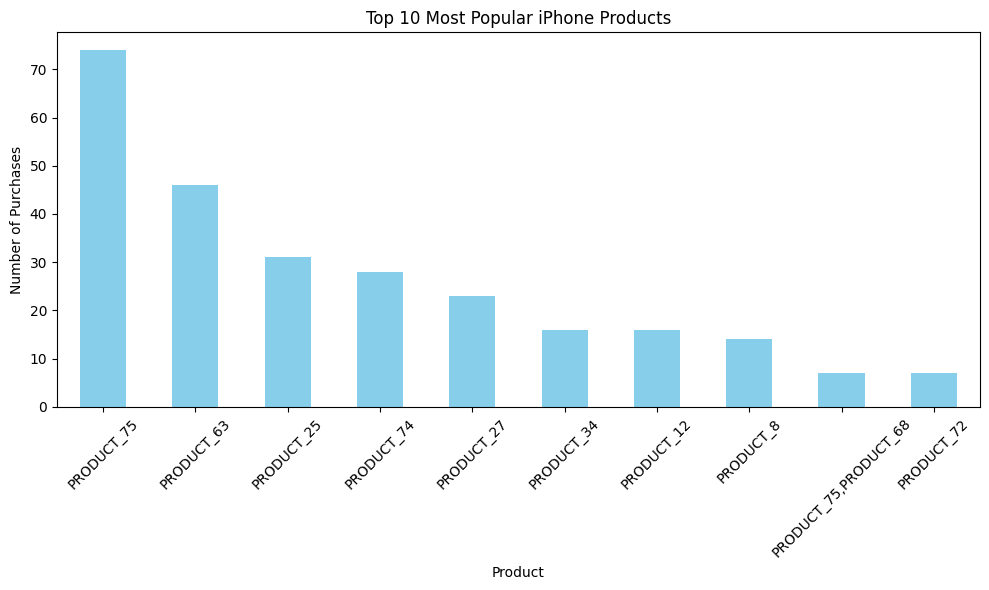

In [23]:
#Q1
#Most popular iPhone products by sales frequency
popular_products = Order_Details['Product'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular iPhone Products')
plt.xlabel('Product')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


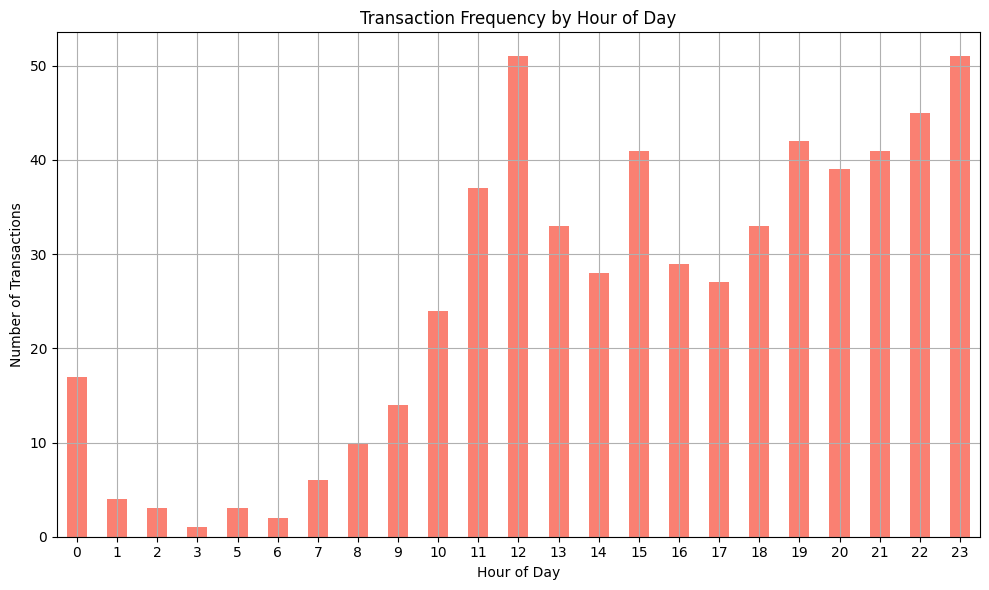

In [24]:
#Q2
# Transactions by hour
hourly_sales = Order_Details['Hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='bar', color='salmon')
plt.title('Transaction Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


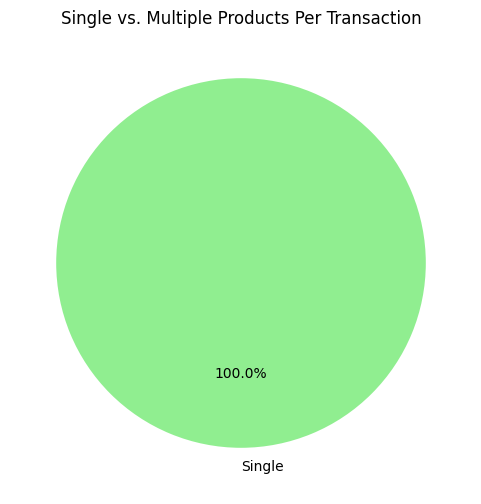

In [25]:
#Q3
# Count products per transaction by grouping Email + Transaction Date
grouped = Order_Details.groupby(['Email', 'Transaction Date']).size()

# Classify as single or multiple product transactions
single_vs_multiple = grouped.apply(lambda x: 'Multiple' if x > 1 else 'Single')
counts = single_vs_multiple.value_counts()

# Plot
plt.figure(figsize=(6, 6))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
plt.title('Single vs. Multiple Products Per Transaction')
plt.ylabel('')
plt.show()


Percentage of returning customers: 8.95%


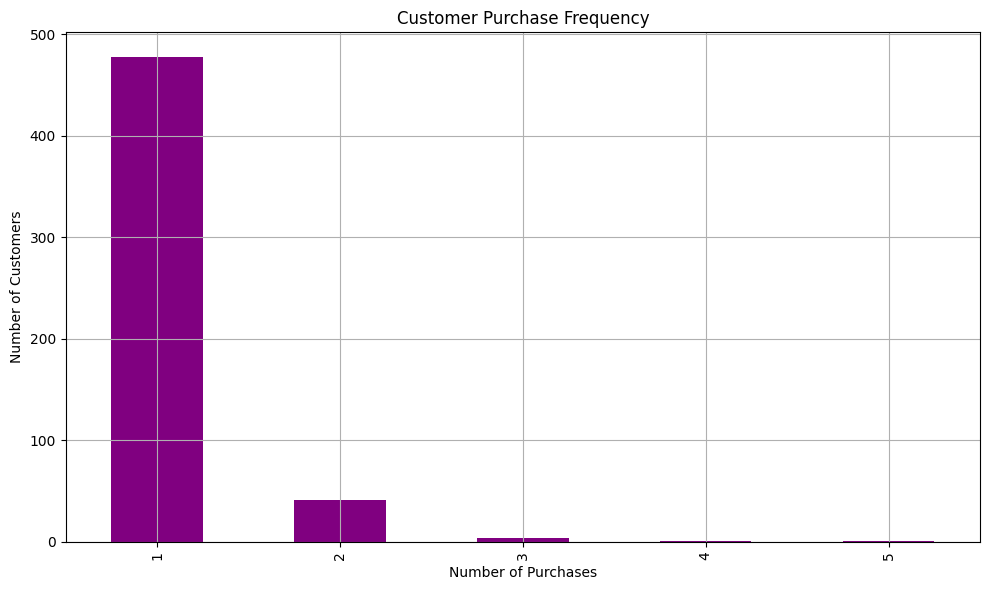

In [26]:
#Q4
# Count purchases per customer
purchase_counts = Order_Details['Email'].value_counts()

# Number of customers with more than 1 purchase
repeat_customers = purchase_counts[purchase_counts > 1].count()
total_customers = purchase_counts.count()

# Percent returning customers
percent_returning = (repeat_customers / total_customers) * 100
print(f"Percentage of returning customers: {percent_returning:.2f}%")

# Plot purchase frequency
plt.figure(figsize=(10, 6))
purchase_counts.value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
'''CLustering Model
#*Hour – time of transaction

Month – seasonal behavior

Email – for tracking, though not used in modeling '''
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = Order_Details[['Hour', 'Month']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


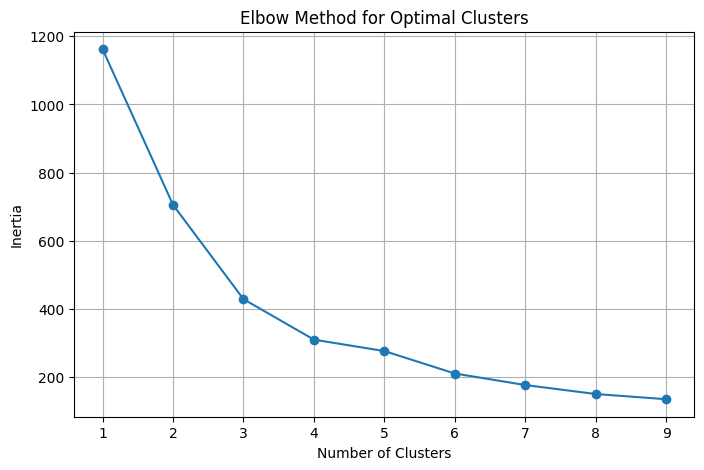

In [28]:
#Find Optimal Number of Clusters (ELbow Method)
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [29]:
#Train KMeans model
# Train model
kmeans = KMeans(n_clusters=3, random_state=42)
Order_Details['Cluster'] = kmeans.fit_predict(X_scaled)


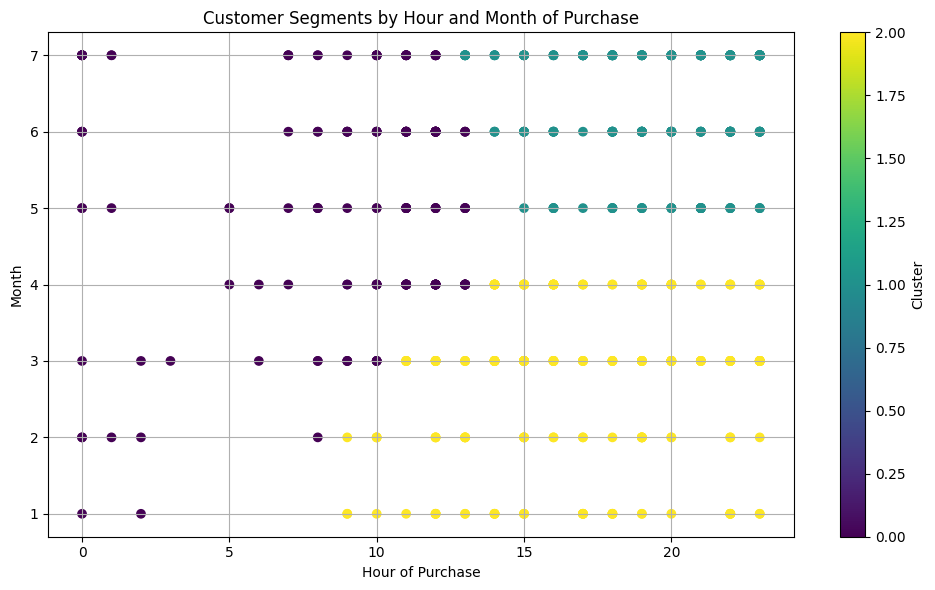

In [30]:
#Visualize
# Visualize Hour vs. Month, colored by cluster
plt.figure(figsize=(10, 6))
plt.scatter(Order_Details['Hour'], Order_Details['Month'], c=Order_Details['Cluster'], cmap='viridis')
plt.title('Customer Segments by Hour and Month of Purchase')
plt.xlabel('Hour of Purchase')
plt.ylabel('Month')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


## Clustering Results

We segmented customers into 3 clusters based on the time and season of their purchases:

- **Cluster 0**: Midday summer shoppers
- **Cluster 1**: Evening or winter shoppers
- **Cluster 2**: Morning weekday buyers

These insights can inform marketing strategies like time-targeted promotions or seasonal product offerings.
